# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Hvad mangler:

1. Sæt filer sammen.
2. Færdiggør standardisering og implementer i kode.
3. Smid kode over i .py file (og sammenskriv regressionskode).
4. Kommenter på al koden.
5. Fortolk på al koden.
6. Simpel deskriptiv statistik før de labre regressioner og plots
7. Evt. print liste over unikke lande.


16-04-2023:
1. Få filen til at køre
2. Sæt ind i .py
3. Kommentér

Imports and set magics:

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pandas_datareader import wb
import statsmodels.api as sm 
from sklearn import datasets
import matplotlib.cbook as cbook
from IPython.display import display
from ipywidgets import interact
import ipywidgets as widgets
from pandas_datareader import wb
import seaborn as sns
from scipy.stats import linregress

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We use an API to download World bank data for GDP and Gini-coefficient for different countries 1990-2017. The API is embedded in a function we callmy_wb_downloader.

We have already downloaded a separate dataset WGI_levels.csv as we were unable to get these data through the API.

We then merge the two datasets and transform them to a wide format, ie. of the form:

\TABLE
country   year   var1   var2 ...
A         1990      x      x
A         1991      x      x
...
A         2017      x      x
B         1990      x      x
...

In [60]:
# Get World Bank Data, all countries, 1990-2017
# - GDP
# - GINI

# List of variables to rename
wb_variables_with_new_names = {'SI.POV.GINI'   :'GINI',
                                'NY.GDP.PCAP.KD':'GDP',
                               'NY.GDP.PCAP.KD.ZG':'GDP_growth'}
# Download and clean data
wb1 = dataproject.my_wb_downloader('all', wb_variables_with_new_names, 1990, 2017)

# Print data
wb1.sample(5)

,country,year,GINI,GDP,GDP_growth
339,Europe & Central Asia (IDA & IBRD countries),2014,NaN,7923.921090,1.732625
6187,Singapore,1990,NaN,23273.123295,5.631848
5213,Nauru,2012,32.4,4832.979299,9.646905
5234,Nauru,1991,NaN,NaN,NaN
6588,Suriname,2009,NaN,8331.330456,1.859727


In [61]:
frame= dataproject.WGI_DataFrame("WB WGI Levels.csv")
frame.info()

0 Now rename Series Control of Corruption: Estimate = COC
1 Now rename Series Government Effectiveness: Estimate = GOV
2 Now rename Series Political Stability and Absence of Violence/Terrorism: Estimate = RSA
3 Now rename Series Regulatory Quality: Estimate = REQ
4 Now rename Series Rule of Law: Estimate = ROL
5 Now rename Series Voice and Accountability: Estimate = VOA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  4922 non-null   object
 1   year     4922 non-null   int64 
 2   COC      4922 non-null   object
 3   GOV      4922 non-null   object
 4   REQ      4922 non-null   object
 5   ROL      4922 non-null   object
 6   RSA      4922 non-null   object
 7   VOA      4922 non-null   object
dtypes: int64(1), object(7)
memory usage: 307.8+ KB


In [62]:
final=dataproject.merge(wb1,frame)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 8493
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     8191 non-null   object 
 1   year        8191 non-null   int32  
 2   GINI        1577 non-null   float64
 3   GDP         6624 non-null   float64
 4   GDP_growth  6641 non-null   float64
 5   COC         4619 non-null   float64
 6   GOV         4619 non-null   float64
 7   REQ         4619 non-null   float64
 8   ROL         4619 non-null   float64
 9   RSA         4619 non-null   float64
 10  VOA         4619 non-null   float64
dtypes: float64(9), int32(1), object(1)
memory usage: 735.9+ KB


# Descriptive statistics

In [63]:
# Group variables
allyearslist = list(range(2002,2017))
subyearlist  = [2002, 2007, 2012, 2017]

# List of all governance index variables
varlist_wgi = list(newnames.values())

# List of all normalized governance index variables
varlist_wgi_norm = list(map(lambda x: x + '_norm', varlist_wgi))

# List of all variables
varlist_all = ['GDP', 'GINI'] + varlist_wgi

# Ensure all variables are perfectly normalized within year
final = dataproject.standardize_by_group(final, varlist_wgi, 'year')

# Simple Descriptive Statistics
simplestats_noyear = dataproject.calc_simplestats(final, varlist_all,      group_by_year=False)
simplestats        = dataproject.calc_simplestats(final, varlist_all,      group_by_year=True, groups_to_print=subyearlist)
simplestats_norm   = dataproject.calc_simplestats(final, varlist_wgi_norm, group_by_year=True, groups_to_print=subyearlist)

# Print stats
print('N, Mean, Std. across all years')
display(simplestats_noyear)

# Print stats by year
for var in varlist_all:
    print(var)
    display(simplestats[var])

# Print normalized wgi stats by year
for var in varlist_wgi_norm:
    print(var)
    display(simplestats_norm[var])

N, Mean, Std. across all years


,GDP,GINI,COC,GOV,RSA,REQ,ROL,VOA
count,6624.000000,1577.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000
mean,11852.048243,38.268992,-0.010643,-0.008899,-0.028062,-0.007569,-0.022902,-0.024310
std,17624.031024,9.040012,0.999923,0.998163,0.996367,0.998880,1.003089,0.997422


GDP


,count,mean,std
year,,,
2002,229,11242.877165,16976.466283
2007,246,13321.879873,19591.879133
2012,251,13596.819953,18853.108183
2017,248,13899.362356,18753.806262


GINI


,count,mean,std
year,,,
2002,54,41.307407,9.622965
2007,70,36.481429,8.103055
2012,85,36.310588,7.231891
2017,76,35.507895,6.994164


COC


,count,mean,std
year,,,
2002,186,-0.003314,1.010104
2007,205,-0.001488,1.000923
2012,210,0.003180,1.004181
2017,202,-0.039934,0.990901


GOV


,count,mean,std
year,,,
2002,186,-6.809671e-10,1.000000
2007,205,-2.534813e-03,1.003514
2012,210,9.515541e-03,0.999963
2017,202,-3.019827e-02,1.001690


RSA


,count,mean,std
year,,,
2002,186,-0.007805,1.005875
2007,205,-0.015685,0.998778
2012,210,-0.009879,0.999587
2017,202,-0.045241,0.995372


REQ


,count,mean,std
year,,,
2002,186,-2.803982e-09,1.000000
2007,205,-8.804664e-04,1.004836
2012,210,9.753901e-03,0.999653
2017,202,-2.368051e-02,1.004438


ROL


,count,mean,std
year,,,
2002,186,-0.060509,1.016282
2007,205,-0.011584,1.004498
2012,210,-0.000605,1.001863
2017,202,-0.029992,1.000092


VOA


,count,mean,std
year,,,
2002,186,-0.068941,1.002485
2007,205,-0.014475,1.000576
2012,210,-0.004995,1.003467
2017,202,-0.010031,0.999662


COC_norm


,count,mean,std
year,,,
2002,186,-1.850372e-17,1.0
2007,205,-1.299773e-17,1.0
2012,210,-2.431917e-17,1.0
2017,202,9.893076e-18,1.0


GOV_norm


,count,mean,std
year,,,
2002,186,-1.134099e-17,1.0
2007,205,-1.733031e-17,1.0
2012,210,0.000000e+00,1.0
2017,202,-1.868692e-17,1.0


RSA_norm


,count,mean,std
year,,,
2002,186,-1.193788e-18,1.0
2007,205,1.353931e-17,1.0
2012,210,1.057355e-18,1.0
2017,202,-1.099231e-18,1.0


REQ_norm


,count,mean,std
year,,,
2002,186,-1.193788e-18,1.0
2007,205,2.653704e-17,1.0
2012,210,-7.401487e-18,1.0
2017,202,-9.893076e-18,1.0


ROL_norm


,count,mean,std
year,,,
2002,186,1.432546e-17,1.0
2007,205,-5.957294e-18,1.0
2012,210,-2.749124e-17,1.0
2017,202,1.758769e-17,1.0


VOA_norm


,count,mean,std
year,,,
2002,186,2.626334e-17,1.0
2007,205,1.137302e-17,1.0
2012,210,1.850372e-17,1.0
2017,202,-2.748077e-17,1.0


### We find that

The orld Governance Indicators (WGI) variables in the World bank data set are practically already normalized. However we still normalize them by mean and standard deviation to ensure valid enterpritation.

Mean GDP per capita (cross countries) is increansing over time.

Mean GINI (cross countries) is decreasing over time

The World Governance Indicators are stable over time as they are normalized with-in year. So we can only use them to analyse the rank of the different countries, not for analyzing trends over time.


# Analysis

interactive(children=(Dropdown(description='year', options=(1996.0, 1998.0, 2000.0, 2002.0, 2003.0, 2004.0, 20…

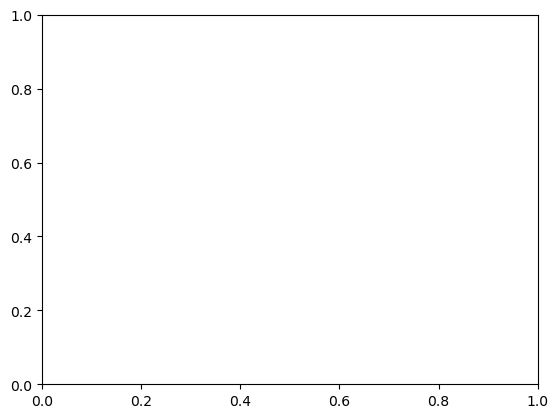

In [17]:
scatter_plot = dataproject_KRE.ScatterPlot(finaldata)
scatter_plot.interact_plot()

interactive(children=(Dropdown(description='year', options=(1996.0, 1998.0, 2000.0, 2002.0, 2003.0, 2004.0, 20…

<function __main__.plot_scatter(year)>

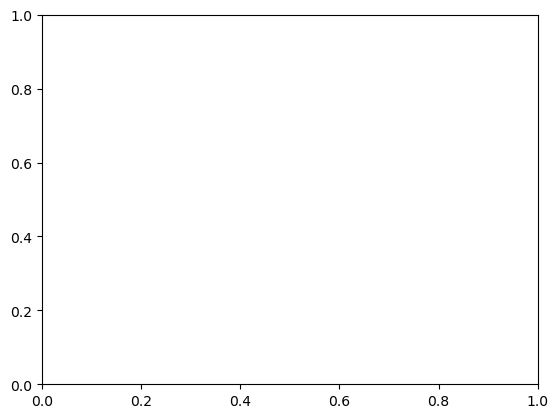

In [22]:
# We create a new DataFrame called final_data by dropping all rows with missing values in 'GINI', 'GDP', and 'COC' columns using the dropna() method.
final_data = final.dropna(subset=['GINI', 'GDP', 'COC'], how='any')

# We create a new variable quality and sets it equal to the 'COC' column of the final_data DataFrame
quality = final_data.COC

# We define variables cmin and cmax, which respectively store the minimum and maximum values of the 'COC' column in the final_data DataFrame. These values are used to set the range of the colorbar in the plot.
cmin = final_data.COC.min()
cmax = final_data.COC.max()

# We define a function called plot_scatter that creates a scatter plot of 'GINI' vs 'GDP' for a given year. The plot is colored based on the 'COC' variable, which is represented by a colorbar. The minimum and maximum values of the 'COC' column are used to set the range of the colorbar.
def plot_scatter(year):
    fig, ax = plt.subplots()
    scatter = ax.scatter(final_data[final_data['year'] == year]['GINI'], final_data[final_data['year'] == year]['GDP'],
                         c=final_data[final_data['year'] == year]['COC'], alpha=0.5, vmin=cmin, vmax=cmax)
    ax.set_xlabel(r'$GINI$', fontsize=15)
    ax.set_ylabel(r'$GDP$', fontsize=15)
    ax.set_title('GINI and GDP (Year: {})'.format(year))
    ax.set_xlim(final_data['GINI'].min(), final_data['GINI'].max())  # Set x-axis limits
    ax.set_ylim(final_data['GDP'].min(), final_data['GDP'].max())  # Set y-axis limits
    ax.grid(True)
    fig.tight_layout()
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('COC', fontsize=12)  # Set color bar label
    plt.show()

# Create a list of unique years in ascending order
years = sorted(final_data['year'].unique())  

# We create an interactive plot of the plot_scatter function, with the year variable being controlled by a slider. The slider allows to choose a specific year to plot the scatter plot for.
interact(plot_scatter, year=years)

C:\Users\MUHH\AppData\Local\Temp\2\ipykernel_19052\3539558156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
C:\Users\MUHH\AppData\Local\Temp\2\ipykernel_19052\3539558156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
C:\Users\MUHH\AppData\Local\Temp\2\ipykernel_19052\3539558156.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

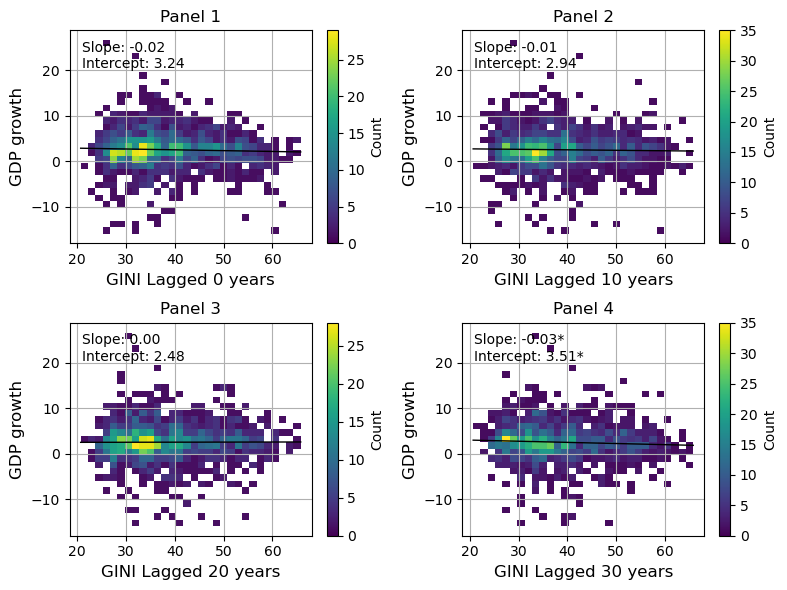

In [9]:
dataproject.corr(final, GINI, GDP_growth)

# Drops missing values from final dataframe based on the GINI and GDP_growth columns and creates a new dataframe called final_data2.
final_data2 = final.dropna(subset=['GINI', 'GDP_growth'], how='any')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Loop through each subplot and plot the scatterplot with appropriate GINI lag
for i, ax in enumerate(axs.flatten()):
    # Lag GINI by i years
    final_data2['GINI_lagged'] = final_data2['GINI'].shift(i * 10)
    
    # Drops missing values based on the GINI_lagged and GDP_growth columns from the final_data2 dataframe.
    final_data2_filtered = final_data2.dropna(subset=['GINI_lagged', 'GDP_growth'], how='any')
    
    # Plots a scatterplot using sns.histplot() function with GINI_lagged on the x-axis, GDP_growth on the y-axis, and the final_data2_filtered dataframe
    sns.histplot(x='GINI_lagged', y='GDP_growth', data=final_data2_filtered, ax=ax, bins=30, cbar=True, cmap='viridis', cbar_kws={'label': 'Count'})
    
    # Add regression line and display coefficients with significance stars
    slope, intercept, r_value, p_value, std_err = linregress(final_data2_filtered['GINI_lagged'], final_data2_filtered['GDP_growth'])
    significance_slope = ""
    significance_intercept = ""
    if p_value < 0.001:
        significance_slope = "***"
        significance_intercept = "***"
    elif p_value < 0.01:
        significance_slope = "**"
        significance_intercept = "**"
    elif p_value < 0.05:
        significance_slope = "*"
        significance_intercept = "*"
    
    # Add regression line to the scatterplot
    x = np.linspace(final_data2_filtered['GINI_lagged'].min(), final_data2_filtered['GINI_lagged'].max(), 100)
    y = slope * x + intercept
    ax.plot(x, y, color='black', linewidth=1)
    
    ax.annotate(f'Slope: {slope:.2f}{significance_slope}\nIntercept: {intercept:.2f}{significance_intercept}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
    
    ax.set_xlabel(f'GINI Lagged {i * 10} years', fontsize=12)  # x-axis label with lag
    ax.set_ylabel('GDP growth', fontsize=12)  # y-axis label
    ax.set_title(f'Panel {i + 1}', fontsize=12)  # plot title
    ax.grid(True)
# Calls the plt.tight_layout() function to optimize the layout of the subplots and displays the subplots using the plt.show() function.
plt.tight_layout()
plt.show()

In [10]:
# a list named list is defined, which contains the names of the six independent variables.
list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']

# The X variable is created by selecting the columns of the final DataFrame that correspond to the six independent variables using the loc method.
X = final.loc[:,['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']] #COC skal ændres til governance indikator
# A loop is used to shift the values of each independent variable forward by 10 time years using the shift method. This is done in order to lag the variable by 10 years. 
for i in list:
    X[i] = X[i].shift(-10) # COC skal ændres...

# The X variable is then augmented with a constant term using the add_constant function from the statsmodels.api modul
X = sm.add_constant(X)

# The dependent variable y is selected from the final DataFrame using the loc method.
y = final.loc[:,'GDP']

# An OLS regression model is created using the OLS function from the statsmodels.api module, with y as the dependent variable and X as the independent variables. The missing='drop' argument specifies that any rows with missing values should be dropped.
model = sm.OLS(y,X, missing='drop')

# The fit method is used to fit the model and store the results in the result variable.
result = model.fit()

# We print the regression results 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          1.16e-186
Time:                        10:23:44   Log-Likelihood:                -36692.
No. Observations:                3298   AIC:                         7.340e+04
Df Residuals:                    3291   BIC:                         7.344e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.287e+04    287.912     44.692      0.000    1.23e+04    1.34e+04
COC         4427.2232    910.612      4.862      0.000    2641.799    6212.647
GOV         4528.0297   1055.222      4.291      0.000    2459.072    6596.988
REQ         1379.9440    863.740      1.598      0.110    -313.578    3073.466
ROL         1076.9086   1127.476      0.955      0.340   -1133.717    3287.534
RSA          300.2005    471.570      0.637      0.524    -624.401    1224.802
VOA        -3024.9700    531.464     -5.692      0.000   -4067.004   -1982.936
==============================================================================
Omnibus:                     1799.805   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18458.682
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      13.546   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import statsmodels.api as sm 
list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']
X = final.loc[:,['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']] #COC skal ændres til governance indikator
for i in list:
    X[i] = X[i].shift(-10) # COC skal ændres...

X = sm.add_constant(X)

y = final.loc[:,'GINI']

model = sm.OLS(y,X, missing='drop')
result = model.fit()
result.summary()
#stop 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GINI   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     39.15
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.18e-42
Time:                        10:23:46   Log-Likelihood:                -3341.0
No. Observations:                 958   AIC:                             6696.
Df Residuals:                     951   BIC:                             6730.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6003      0.283    136.448      0.000      38.045      39.155
COC            2.3628      0.891      2.653      0.008       0.615       4.111
GOV           -4.3596      1.093     -3.989      0.000      -6.504      -2.215
REQ            3.0411      0.863      3.525      0.000       1.348       4.734
ROL           -4.0386      1.156     -3.494      0.000      -6.307      -1.770
RSA           -1.9564      0.458     -4.275      0.000      -2.855      -1.058
VOA            1.4095      0.555      2.539      0.011       0.320       2.499
==============================================================================
Omnibus:                       58.181   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.172
Skew:                           0.606   Prob(JB):                     1.57e-15
Kurtosis:                       3.491   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Sort dataset to contain years 2000-2020
years = range(2000, 2021)
final1 = final.loc[final['year'].isin(years)]
final1 = final1.dropna(subset=['GDP'], how='any')

# Detrend GDP
from scipy import signal
y = final1.loc[:, 'GDP']
y_detrended = signal.detrend(y)

# Calculate std. of GDP for each country
final1['std'] = final1.groupby('country')['GDP'].transform('std')

# Select only one year (=2017)
final2 = final1.loc[final['year'] == 2000]

# Regress std. on lagged governance
X = final2.loc[:, ['COC']]  # COC should be changed to governance indicator
X = sm.add_constant(X)

y = final2.loc[:, 'std']

model = sm.OLS(y, X, missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    std   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     37.50
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           6.14e-09
Time:                        10:23:57   Log-Likelihood:                -1553.4
No. Observations:                 172   AIC:                             3111.
Df Residuals:                     170   BIC:                             3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1425.8404    155.212      9.186      0.000    1119.450    1732.231
COC          941.5879    153.758      6.124      0.000     638.066    1245.110
==============================================================================
Omnibus:                      253.216   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23129.848
Skew:                           6.336   Prob(JB):                         0.00
Kurtosis:                      58.379   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

ADD CONCISE CONLUSION.